In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

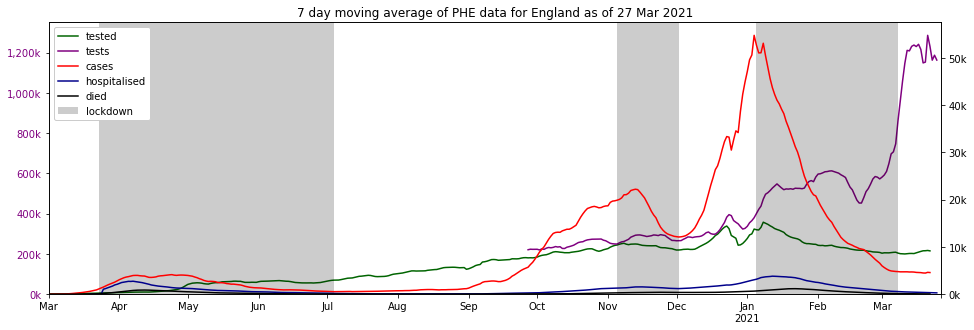

In [2]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

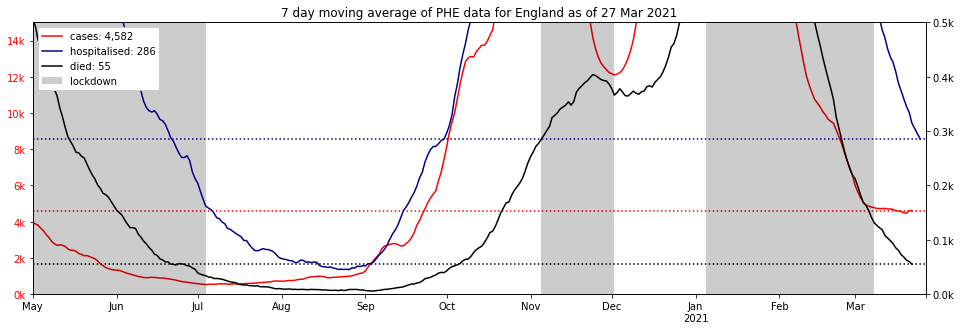

In [3]:
plot_summary(earliest_date='2020-05-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=15_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter, right_ymax=500)

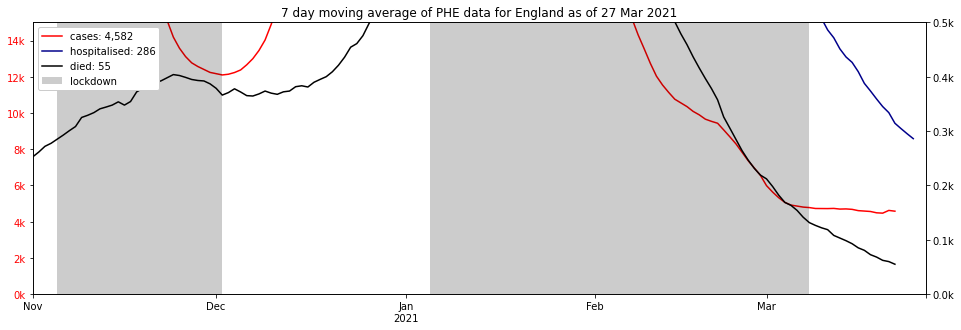

In [4]:
plot_summary(earliest_date='2020-11-01', show_latest=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=15_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter, right_ymax=500)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,2477711.0,25284013.0,22806302.0,56286961,4.401927,40.517913,55.080160
1,Northern Ireland,N92000002,120349.0,719260.0,598911.0,1893667,6.355341,31.627050,62.017609
2,Scotland,S92000003,294714.0,2358807.0,2064093.0,5463300,5.394432,37.781066,56.824502
3,Wales,W92000004,400743.0,1365355.0,964612.0,3152879,12.710383,30.594641,56.694976


'partial: 29,727,435 (44.5%), full: 3,293,517'

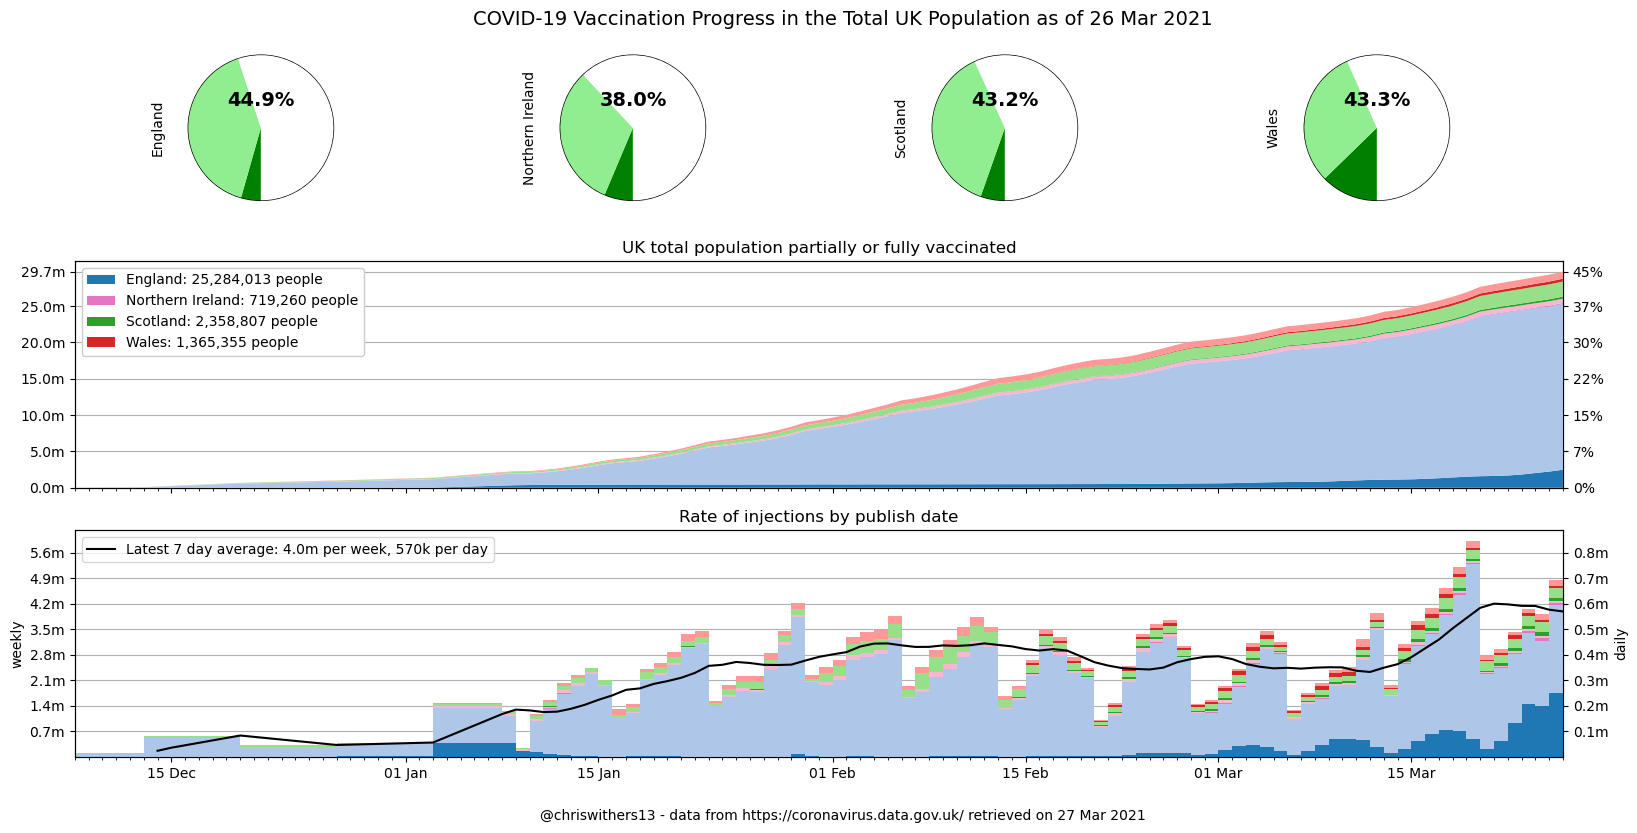

In [5]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

In [6]:
vaccination_changes()

,,First Dose (New),Second Dose (New),Complete (New),First Dose (Total),Second Dose (Total),Complete (Total)
,,,,,,,
England,26 Mar 21,"+344,008","+250,962","+250,962","+25,284,013","+2,477,711","+2,477,711"
Northern Ireland,26 Mar 21,"+7,587","+6,712","+6,712","+719,260","+120,349","+120,349"
Scotland,26 Mar 21,"+35,975","+14,900","+14,900","+2,358,807","+294,714","+294,714"
Wales,26 Mar 21,"+23,735","+11,080","+11,080","+1,365,355","+400,743","+400,743"


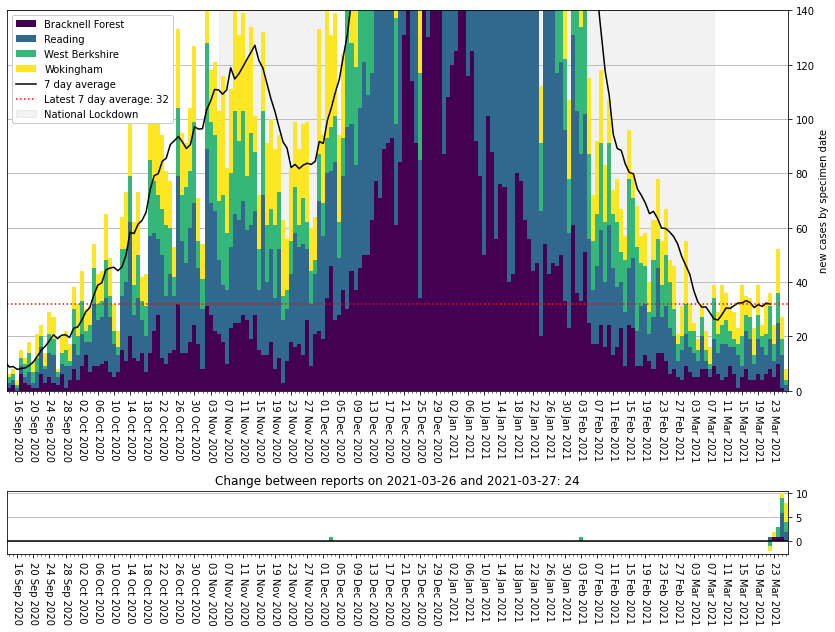

In [7]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=140)

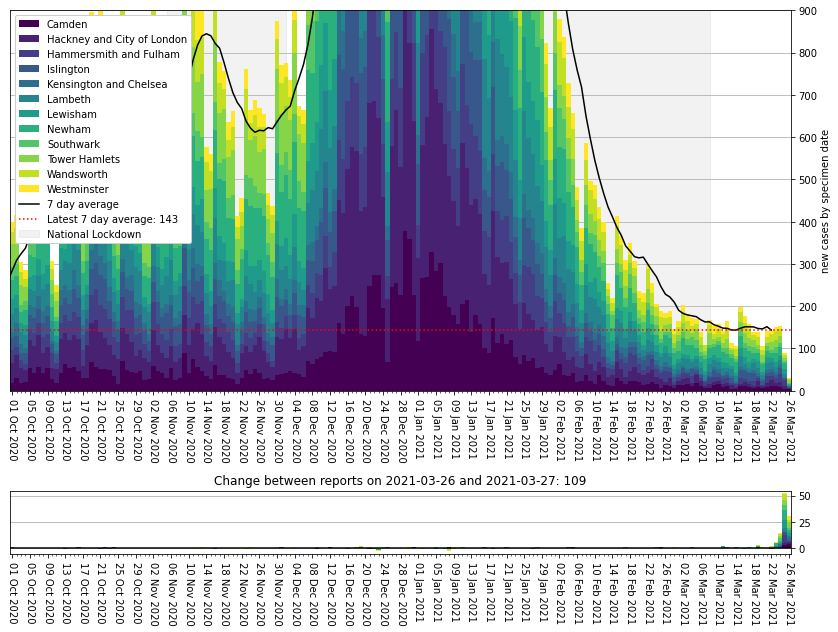

In [8]:
plot_areas(for_date, areas=london_areas, ylim=900)

In [9]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [10]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000150,Corby,216.012628,156.0,2021-03-26
E08000018,Rotherham,154.100621,409.0,2021-03-26
S12000040,West Lothian,144.183506,264.0,2021-03-26
E07000218,North Warwickshire,142.498161,93.0,2021-03-26
E08000016,Barnsley,139.751930,345.0,2021-03-26
E06000013,North Lincolnshire,131.172660,226.0,2021-03-26
S12000050,North Lanarkshire,130.942965,447.0,2021-03-26
E08000032,Bradford,128.386590,693.0,2021-03-26
E08000036,Wakefield,123.739636,431.0,2021-03-26


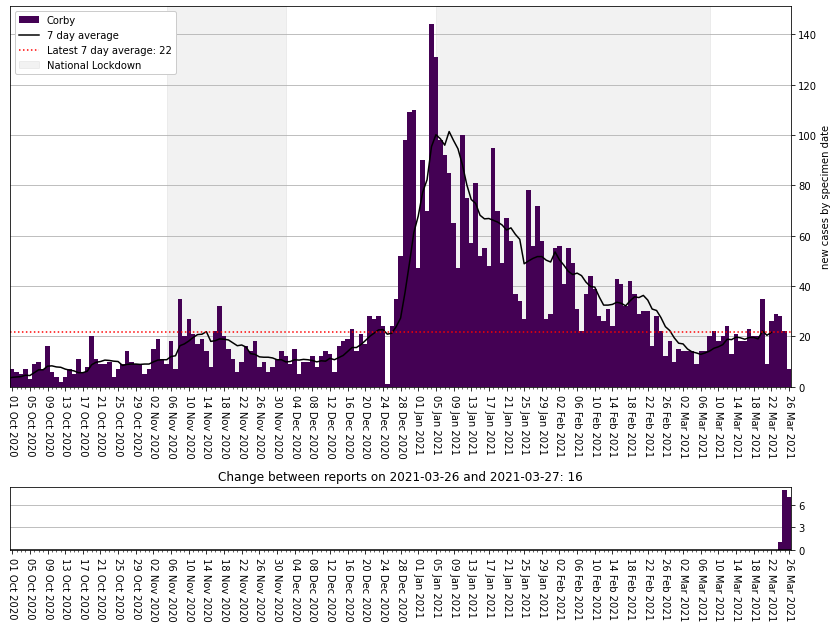

In [11]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [12]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000035,Leeds,103.260589,819.0,2021-03-26
E08000025,Birmingham,64.984201,742.0,2021-03-26
E08000032,Bradford,128.386590,693.0,2021-03-26
E08000019,Sheffield,113.532802,664.0,2021-03-26
S12000049,Glasgow City,96.348244,610.0,2021-03-26
E08000003,Manchester,85.193666,471.0,2021-03-26
S12000050,North Lanarkshire,130.942965,447.0,2021-03-26
E08000034,Kirklees,98.684136,434.0,2021-03-26
E08000036,Wakefield,123.739636,431.0,2021-03-26


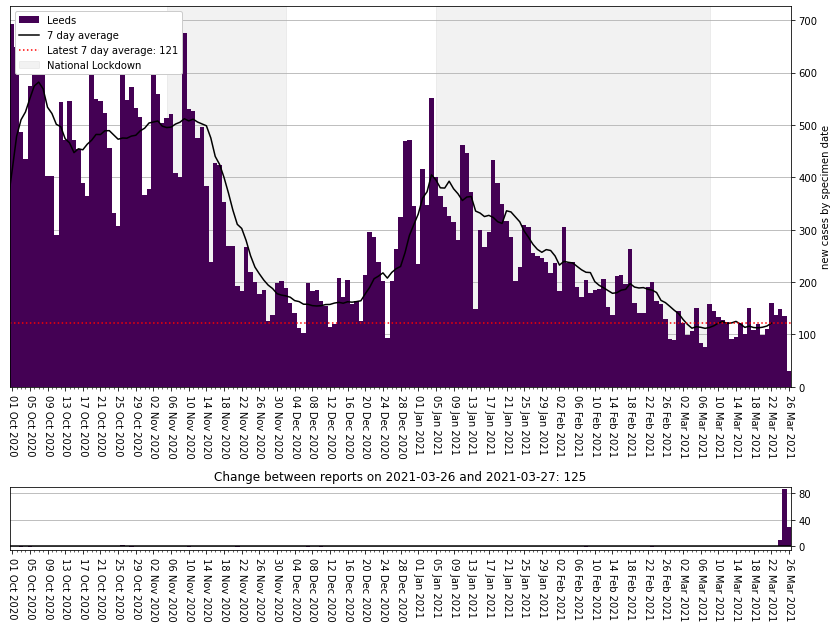

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [14]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.0
phe_max = 0.25

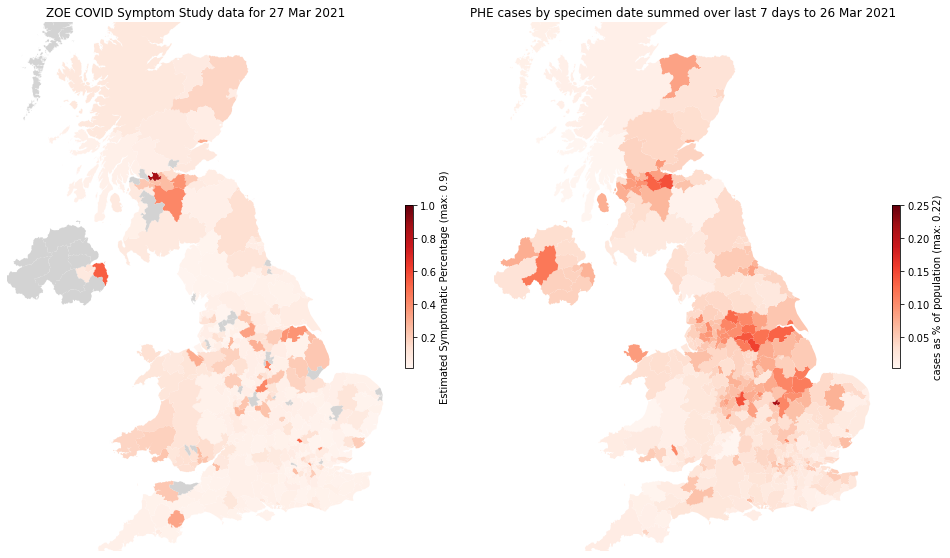

In [15]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [16]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...

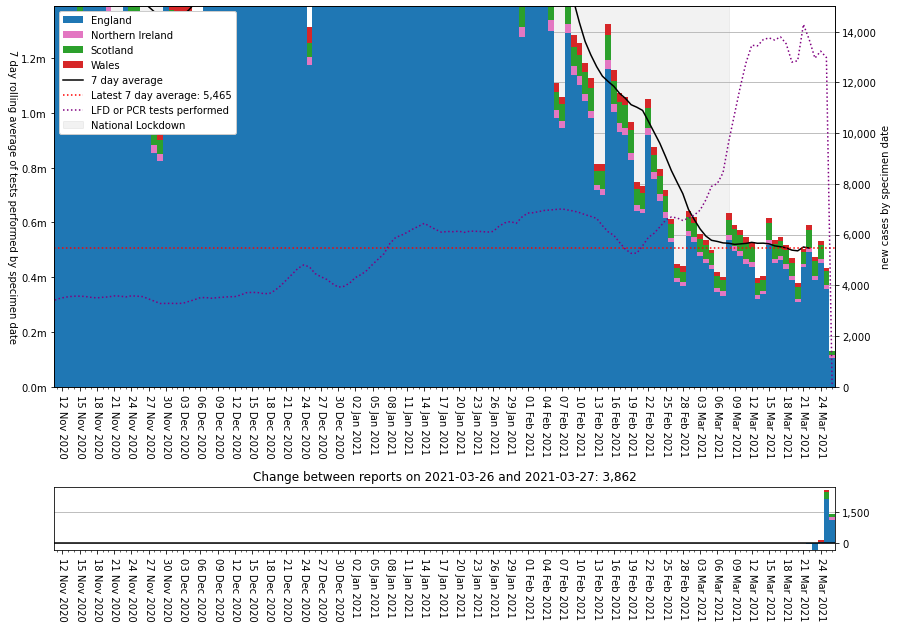

In [17]:
plot_areas(for_date, 'cases_nations', ylim=15_000, earliest='2020-11-11')